### EDA and Popularity Prediction of songs in Spotify Dataset

In [246]:
#Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Dense,Activation
import keras_tuner as kt

###### Data Import and cleaning

In [3]:
# Importing data into Pandas Dataframe

tracks= pd.read_csv('tracks.csv')

#taking glimpse of the data#
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [11]:
print(tracks.shape)
#knowing about fields of the data
tracks.info()

(586672, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  livenes

In [6]:
# check the count of null values for each field
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [65]:
tracks[tracks.name.isna()]['artists'].value_counts()

#This tells that wherever name is null or NAN, artists are also null, so we can completely remove thise rows from the dataset.

['']    71
Name: artists, dtype: int64

In [70]:
#removing rows with null values
tracks= tracks.dropna()

In [71]:
print(tracks.isnull().sum())
print(tracks.shape)

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64
(586601, 20)


In [72]:
#peeping into unique names of the songs/album and counts of the same
tracks['name'].value_counts()

Summertime                                                                                                          101
Intro                                                                                                                92
Year 3000                                                                                                            91
Hold On                                                                                                              87
2000 Years                                                                                                           76
                                                                                                                   ... 
Al Modo Mío                                                                                                           1
Non l'hai mica capito - Remastered 2020                                                                               1
Memphis, Tennessee - Remastered 2015    

In [73]:
tracks.artists.value_counts()

['Die drei ???']                                                                                                                                               3856
['TKKG Retro-Archiv']                                                                                                                                          2006
['Benjamin Blümchen']                                                                                                                                          1503
['Bibi Blocksberg']                                                                                                                                            1472
['Lata Mangeshkar']                                                                                                                                            1373
                                                                                                                                                               ... 
['Hacken Lee', '

In [74]:
tracks[tracks.name=='Summertime']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8097,62Xj6x2LSWv47PtRAXrg5Z,Summertime,53,173493,0,['Billie Holiday'],['1YzCsTRb22dQkh9lghPIrp'],1933,0.628,0.2260,10,-14.075,0,0.0371,0.903,0.000006,0.1710,0.6080,99.392,4
8191,4DBZvNW9wB1vHzzRcFbDZF,Summertime,16,173493,0,['Billie Holiday'],['1YzCsTRb22dQkh9lghPIrp'],1933,0.628,0.2260,10,-14.075,0,0.0371,0.903,0.000006,0.1710,0.6080,99.392,4
9063,2sm4UHxiCzGSN3z77wBbCX,Summertime,0,311040,0,"['Licia Fox', 'Tormy Van Cool']","['4zdsw3NAikek7QUCQewWkY', '5PwJMO1gFDHvYlOrXP...",1934,0.444,0.0982,3,-12.822,0,0.0325,0.929,0.000286,0.1340,0.0749,112.735,3
9073,34Jq65BjzvCDMDD28gjHI4,Summertime,2,100880,0,"['George Gershwin', 'Jascha Heifetz', 'Brooks ...","['1YuknfkSYTTbolRpwZBOv4', '7yaBUcdjmqPP2vIv6F...",1934,0.263,0.1180,0,-23.171,1,0.0378,0.855,0.137000,0.2540,0.2030,91.692,4
9305,6FAoy4Agq5A3lgyGQGmGK4,Summertime,0,291553,0,['Chris G LeBon'],['7GNG4tw2LU9Ziy8NT4EQWk'],1934,0.504,0.5550,9,-11.807,0,0.0470,0.388,0.011000,0.3200,0.6330,135.880,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543589,77L6MCJfCJ3iD37bPQqVVi,Summertime,8,104013,0,"['Lambert, Hendricks & Ross']",['5XILwCCPqHHh1JRnMfzblg'],1959,0.374,0.5000,5,-7.373,0,0.0284,0.638,0.000000,0.1060,0.7010,130.877,4
544526,2diT8KZPZY0eJAmTbssFWr,Summertime,11,245773,0,['Diana Ross'],['3MdG05syQeRYPPcClLaUGl'],1987-05-01,0.316,0.1550,4,-18.818,0,0.0323,0.494,0.000463,0.0837,0.1260,77.384,4
563478,4SwQ8m0PMgkmQND1pkV3CN,Summertime,13,359133,0,['Bill Evans Trio'],['3VEG6gxFIMfl4Cdog26avS'],1964,0.616,0.1590,4,-22.777,0,0.0480,0.544,0.328000,0.0694,0.4400,78.342,4
563713,3mg5oLUFI6sGh99Qrhr8do,Summertime,12,132299,0,['Herb Alpert & The Tijuana Brass'],['09L3cUdx0hq6qn5bKuJJ4I'],1971-07-01,0.752,0.2350,1,-20.726,1,0.0928,0.780,0.231000,0.1510,0.3560,145.994,4


By looking at the first 2 rows, these rows seem to be duplicate, hence we will combine artists and name as a new column and drop the duplicates.

In [79]:
tracks['name_artists']= tracks.apply(lambda x : str(x['name']) + str(x['artists']),axis=1)

In [80]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,name_artists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Carve['Uli']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Capítulo 2.16 - Banquero Anarquista['Fernando ...
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Vivo para Quererte - Remasterizado['Ignacio Co...
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,El Prisionero - Remasterizado['Ignacio Corsini']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Lady of the Evening['Dick Haymes']


The popularity ranges between 0 and 100 and therefore for every duplicate pair of name_artists, we will give the max of popularity to unique values.

In [83]:
t=tracks[tracks.name_artists.duplicated()]

In [84]:
t.shape

(59992, 21)

In [85]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,name_artists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Carve['Uli']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Capítulo 2.16 - Banquero Anarquista['Fernando ...
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Vivo para Quererte - Remasterizado['Ignacio Co...
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,El Prisionero - Remasterizado['Ignacio Corsini']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Lady of the Evening['Dick Haymes']


In [86]:
tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'name_artists'],
      dtype='object')

In [92]:
# convert duration of song from ms into minutes

tracks['duration_min']= round((tracks['duration_ms']/60000),2)

In [94]:
tracks.duration_min.head()

0    2.12
1    1.64
2    3.03
3    2.95
4    2.72
Name: duration_min, dtype: float64

In [121]:
#dropping duration_ms as we have duration_min
tracks.drop(['duration_ms'],axis=1,inplace=True)

In [97]:
#Removing bracets from Artists' names

tracks['artists']= tracks['artists'].str.replace("[","")
tracks['artists']= tracks['artists'].str.replace("]","")
tracks['artists']= tracks['artists'].str.replace("'","")

<ipython-input-97-8f4917942bfe>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tracks['artists']= tracks['artists'].str.replace("[","")
<ipython-input-97-8f4917942bfe>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tracks['artists']= tracks['artists'].str.replace("]","")


In [98]:
tracks.artists

0                               Uli
1                   Fernando Pessoa
2                   Ignacio Corsini
3                   Ignacio Corsini
4                       Dick Haymes
                    ...            
586667                      阿YueYue
586668                   ROLE MODEL
586669                      FINNEAS
586670    Gentle Bones, Clara Benin
586671                    Afrosound
Name: artists, Length: 586601, dtype: object

In [99]:
tracks.duplicated().any().sum()

0

In [108]:
#checking release_dates

tracks.release_date.unique()

array(['1922-02-22', '1922-06-01', '1922-03-21', ..., '1991-05',
       '1996-10-06', '2009-11-28'], dtype=object)

In [115]:
date= list(tracks.release_date)
date
for i in range(len(date)):
    date[i]= int(date[i][:4])

In [116]:
tracks['release_date']=date

In [117]:
tracks.release_date

0         1922
1         1922
2         1922
3         1922
4         1922
          ... 
586667    2020
586668    2020
586669    2020
586670    2021
586671    2015
Name: release_date, Length: 586601, dtype: int64

In [122]:
tracks.columns

#tracks.drop(['realease_year', 'release_year'],axis=1,inplace=True)

Index(['id', 'name', 'popularity', 'explicit', 'artists', 'id_artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'name_artists', 'duration_min'],
      dtype='object')

###### Histogram visuality of numerical fields

In [142]:
def func_distplot(atribute):
    sns.distplot(tracks[atribute])
    plt.show()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


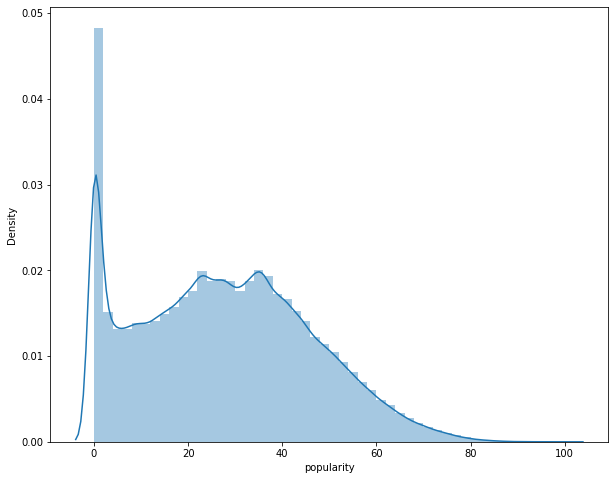

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


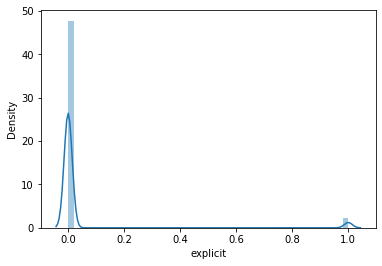

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


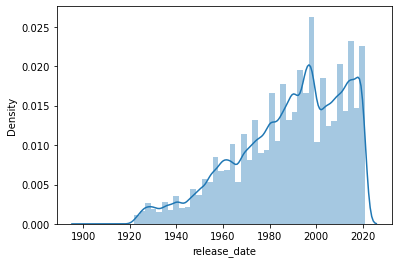

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


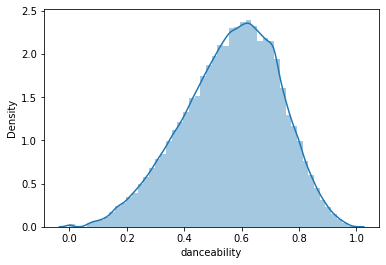

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


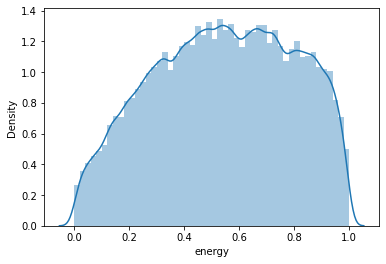

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


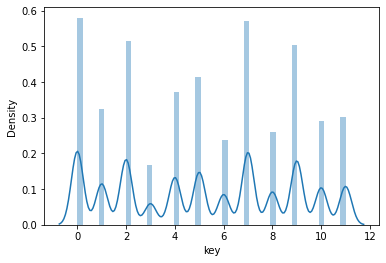

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


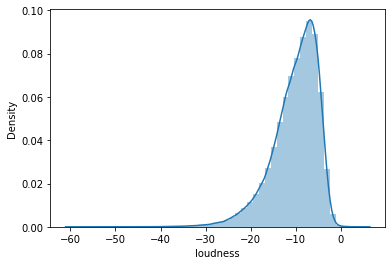

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


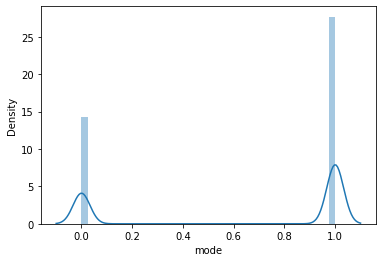

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


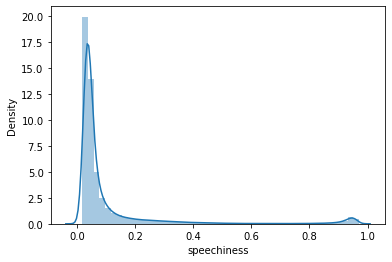

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


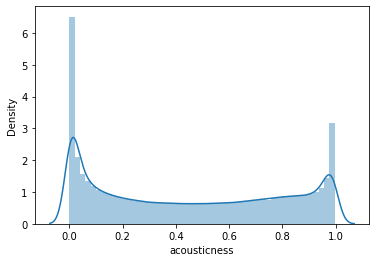

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


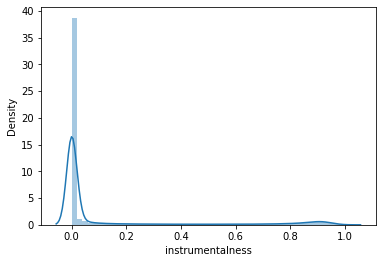

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


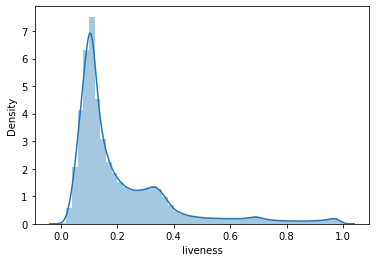

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


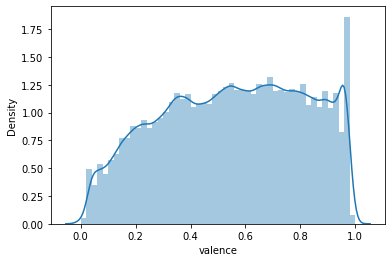

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


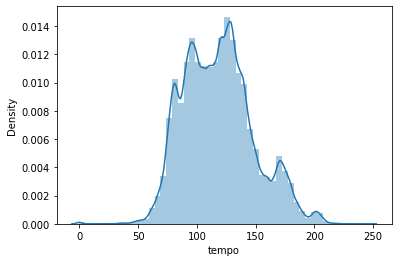

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


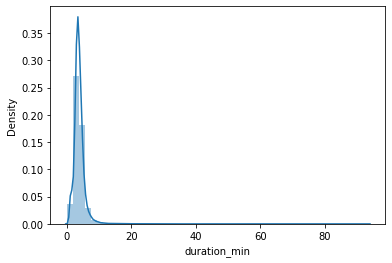

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


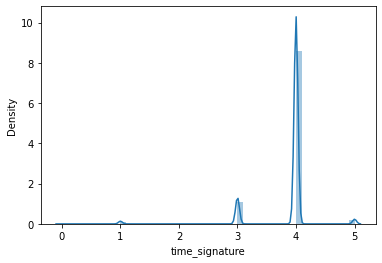

In [143]:
plt.figure(figsize=(10,8))

func_distplot('popularity')
func_distplot('explicit')
func_distplot('release_date')
func_distplot('danceability')
func_distplot('energy')
func_distplot('key')
func_distplot('loudness')
func_distplot('mode')
func_distplot('speechiness')
func_distplot('acousticness')
func_distplot('instrumentalness')
func_distplot('liveness')
func_distplot('valence')
func_distplot('tempo')
func_distplot('duration_min')
func_distplot('time_signature')


#### Constructing Correlation Matrix using Heatmap

<AxesSubplot:>

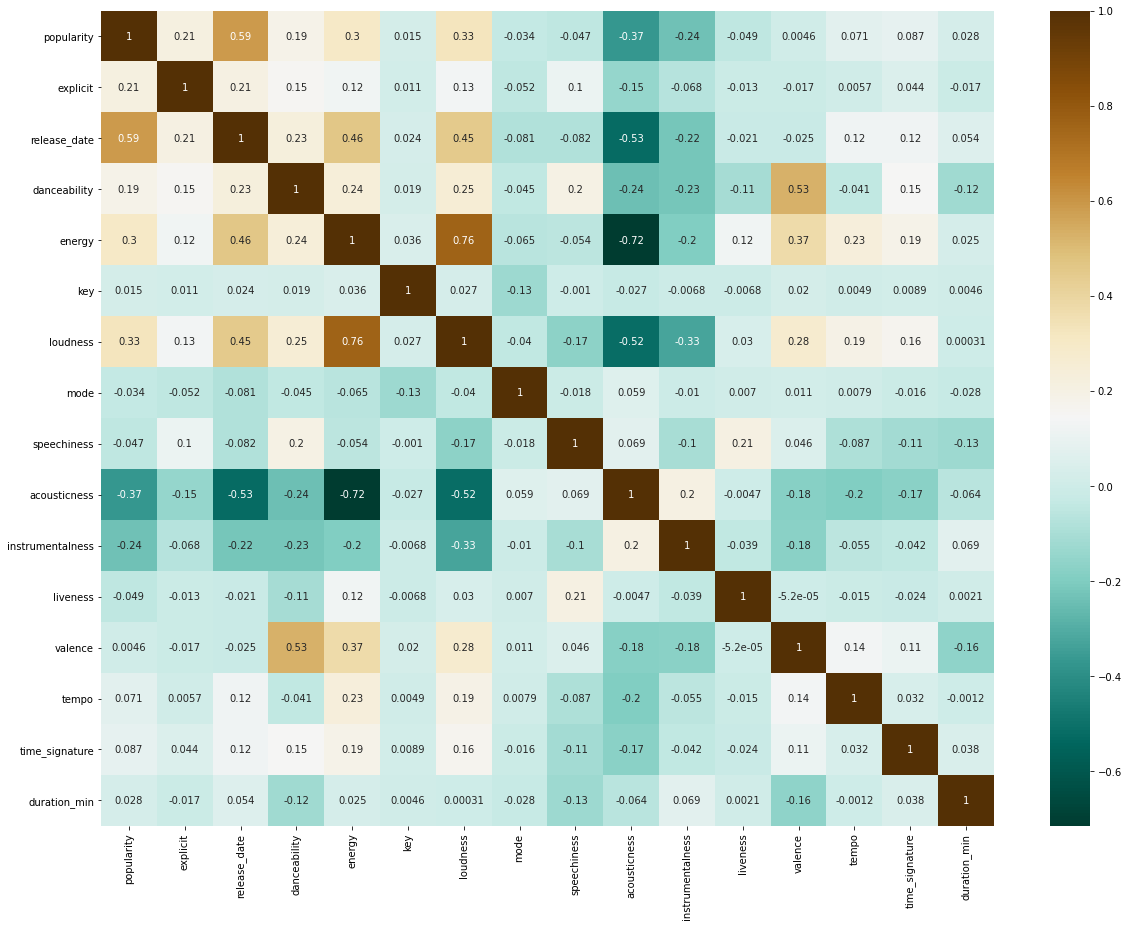

In [145]:
plt.figure(figsize=(20,15))

corr= tracks.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r')

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.

1) Popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

2) Energy also seems to influence a song's popularity.

3) Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

Other things worth noting:

1) Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

2) Acousticness is highly negatively correlated with energy, loudness, and year.

3) Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.



##### 20 Most Popular Tracks

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'Blinding Lights'),
  Text(2, 0, 'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit'),
  Text(3, 0, 'LA NOCHE DE ANOCHE'),
  Text(4, 0, 'Good Days'),
  Text(5, 0, 'Goosebumps - Remix'),
  Text(6, 0, 'Ella No Es Tuya - Remix'),
  Text(7, 0, 'Wellerman - Sea Shanty / 220 KID x Billen Ted Remix'),
  Text(8, 0, 'Paradise (feat. Dermot Kennedy)'),
  Text(9, 0, "Hecha Pa' Mi"),
  Text(10, 0, 'ROCKSTAR (feat. Roddy Ricch)'),
  Text(11, 0, 'DÁKITI'),
  Text(12, 0, 'you broke me first'),
  Text(13, 0, 'What’s Next'),
  Text(14, 0, 'Beautiful Mistakes (feat. Megan Thee Stallion)'),
  Text(15, 0, 'Best Friend (feat. Doja Cat)'),
  Text(16, 0, 'Baila Conmigo (with Rauw Alejandro)'),
  Text(17, 0, 'WAP (feat. Megan Thee Stallion)'),
  Text(18, 0, 'Therefore I Am'),
  Text(19, 0, 'For The Night (feat. Lil Baby & DaBaby)')])

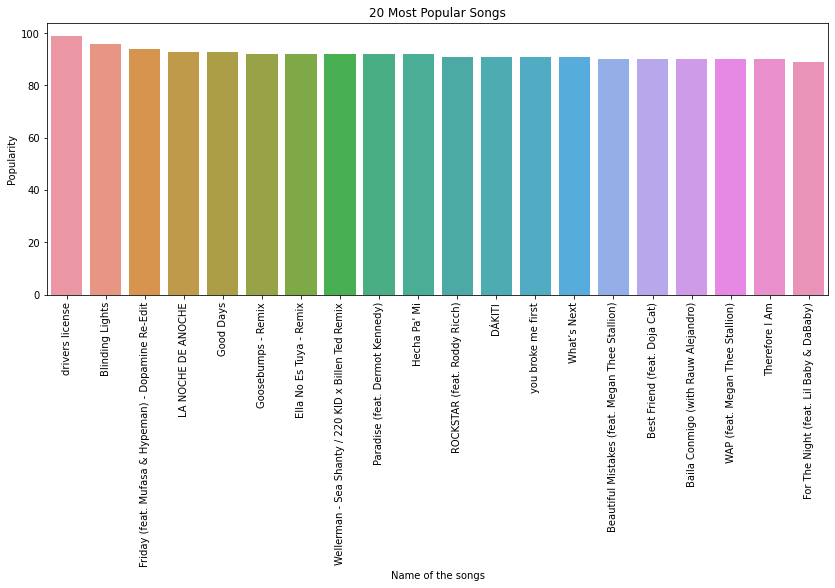

In [156]:
# Finding top 20 popular tracks

pop_20tracks =tracks.groupby('name')['popularity'].mean().sort_values(ascending=False).head(20)
#Popularity ranges between 0 to 100

#Plotting popular 20 tracks

plt.figure(figsize=(14,5))
sns.barplot(pop_20tracks.index,pop_20tracks)
plt.title('20 Most Popular Songs')
plt.xlabel('Name of the songs')
plt.ylabel('Popularity')
plt.xticks(rotation=90)

###### 20 Most Popular Artists

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine'),
  Text(1, 0, 'Los Legendarios, Wisin, Jhay Cortez'),
  Text(2, 0, 'Bad Bunny, ROSALÍA'),
  Text(3, 0, 'Nathan Evans, 220 KID, Billen Ted'),
  Text(4, 0, 'MEDUZA, Dermot Kennedy'),
  Text(5, 0, 'Rochy RD, Myke Towers, Nicki Nicole'),
  Text(6, 0, 'Travis Scott, HVME'),
  Text(7, 0, 'Bad Bunny, Jhay Cortez'),
  Text(8, 0, 'Saweetie, Doja Cat'),
  Text(9, 0, 'Maroon 5, Megan Thee Stallion'),
  Text(10, 0, 'Billie Eilish, Khalid'),
  Text(11, 0, 'Drake, Lil Baby'),
  Text(12, 0, 'Powfu, beabadoobee'),
  Text(13, 0, 'Drake, Lil Durk'),
  Text(14, 0, 'Milly, Farruko, Nio Garcia, Jay Wheeler, Amenazzy'),
  Text(15, 0, 'Sech, Daddy Yankee, J Balvin, ROSALÍA, Farruko'),
  Text(16, 0, 'ElyOtto'),
  Text(17, 0, 'Wisin, Myke Towers, Los Legendarios'),
  Text(18, 0, 'Ritt Momney'),
  Text(19, 0, 'Pop Smoke, A Boogie Wit da Hoodie')])

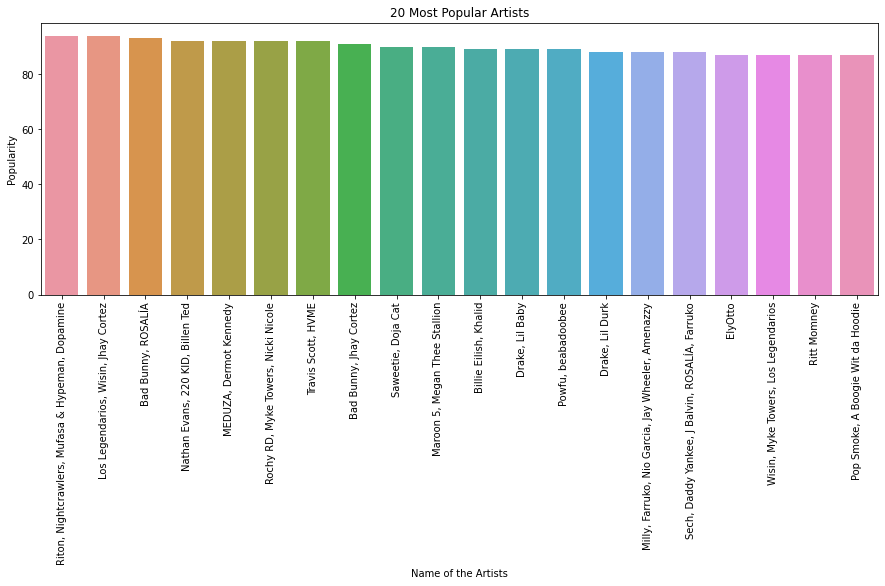

In [155]:
# Finding top 20 popular Artists

pop_20artists =tracks.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)
#Popularity ranges between 0 to 100

#Plotting popular 20 Artists

plt.figure(figsize=(15,5))
sns.barplot(pop_20artists.index,pop_20artists)
plt.title('20 Most Popular Artists')
plt.xlabel('Name of the Artists')
plt.ylabel('Popularity')
plt.xticks(rotation=90)

###### Parameters influence by year

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

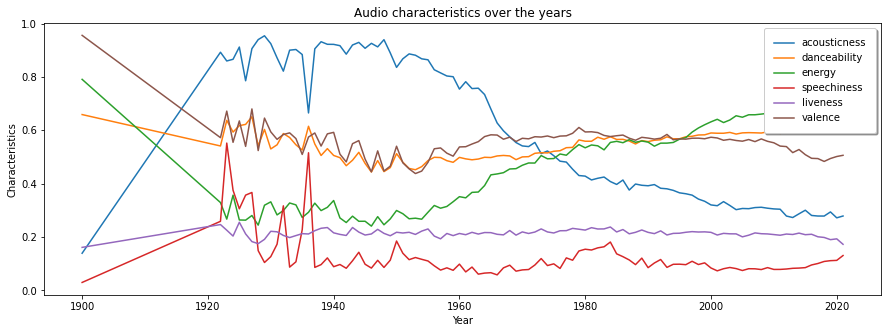

In [162]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,5))
for c in columns:
    x = tracks.groupby('release_date')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years')
plt.xlabel('Year')
plt.ylabel('Characteristics')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
plt.show()

###### Artists with maximum number of songs

In [164]:
y=pd.DataFrame(tracks['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Die drei ???,3856
1,TKKG Retro-Archiv,2006
2,Benjamin Blümchen,1503
3,Bibi Blocksberg,1472
4,Lata Mangeshkar,1373


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Die drei ???'),
  Text(1, 0, 'TKKG Retro-Archiv'),
  Text(2, 0, 'Benjamin Blümchen'),
  Text(3, 0, 'Bibi Blocksberg'),
  Text(4, 0, 'Lata Mangeshkar')])

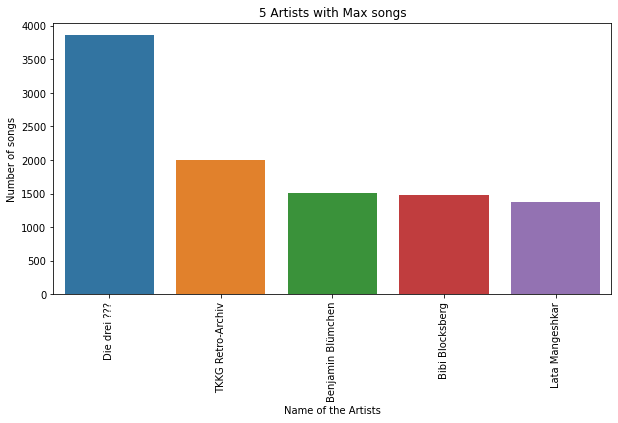

In [172]:
# Artists with max no. of songs

artists_maxsongs =tracks.groupby('artists')['name'].count().sort_values(ascending=False).head(5)
#Popularity ranges between 0 to 100

#Plotting 5 artists with max songs

plt.figure(figsize=(10,5))
sns.barplot(artists_maxsongs.index,artists_maxsongs)
plt.title('5 Artists with Max songs')
plt.xlabel('Name of the Artists')
plt.ylabel('Number of songs')
plt.xticks(rotation=90)

##### Songs released Year-wise

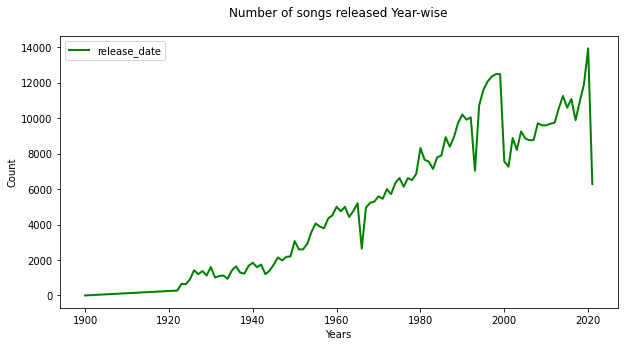

In [178]:
year = pd.DataFrame(tracks['release_date'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(10,5) ,color='Green', linewidth=2)
plt.title("Number of songs released Year-wise",y=1.05)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

In [179]:
tracks.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,1])

,popularity,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,0.044091,1988.571729,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,3.834241
std,18.369417,0.205298,22.826243,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,2.108886
min,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
25%,13.000000,0.000000,1974.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,2.920000
50%,27.000000,0.000000,1992.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,3.580000
75%,41.000000,0.000000,2007.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,4.400000
80%,44.000000,0.000000,2010.000000,0.709000,0.793000,9.000000,-5.950000,1.000000,0.095200,0.843000,0.043400,0.318000,0.811000,141.058000,4.000000,4.630000
90%,52.000000,0.000000,2016.000000,0.769000,0.881000,10.000000,-4.751000,1.000000,0.212000,0.950000,0.649000,0.428000,0.899000,160.188000,4.000000,5.390000
100%,100.000000,1.000000,2021.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,93.690000


##### Feature Selection

ids,names and artists contains many unique values, so we can drop these columns.


In [313]:
t1 = tracks.copy()

In [314]:
t1= t1.drop(['id','name'],axis=1)

In [315]:
t1= t1.drop(['id_artists','artists'],axis=1)

In [316]:
t1= t1.drop(['name_artists'],axis=1)

In [317]:
t1.shape

(586601, 16)

###### Feature scaling

Before feeding to the model, we will have to scale the features in order to bring all the values at same scale
Almost every feature is already scaled between 0 and 1.
We will divide popularity < 57 as 0 (Non-popular) and remaining as 1 (Popular)

In [323]:
x = t1.loc[:, t1.columns!='popularity']
y= t1['popularity'].apply(lambda value : 0 if value<57 else 1)
#y= t2.loc[:, t1.columns=='popularity']
y


0         0
1         0
2         0
3         0
4         0
         ..
586667    0
586668    1
586669    1
586670    1
586671    0
Name: popularity, Length: 586601, dtype: int64

In [325]:
x= x.astype('float32') #for neural network
y= y.astype('float32')
x.columns

Index(['explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_min'],
      dtype='object')

##### Building Neural Network

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [327]:
[i.shape for i in (x_train, x_test, y_train, y_test)]

[(469280, 15), (117321, 15), (469280,), (117321,)]

In [336]:
def model_builder(hp):
  model = keras.Sequential()
  #model.add(keras.layers.InputLayer(shape=(13,)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  for i in range(hp.Int("num_layers", 2, 20)):
        model.add(keras.layers.Dense(units=hp_units, activation='relu',input_shape=(15,)))
        model.add(keras.layers.Dense(units=hp_units, activation=hp.Choice('dense_activation', 
                values=['relu', 'tanh', 'elu'])))
        model.add(keras.layers.Dense(units=hp_units, activation=hp.Choice('dense_activation', 
                values=['relu', 'tanh', 'elu'])))
        model.add(keras.layers.Dense(units=hp_units, activation=hp.Choice('dense_activation', 
                values=['relu', 'tanh', 'elu'])))
        model.add(keras.layers.Dropout(0.2))
        
        
  model.add(keras.layers.Dense(units=1,activation='sigmoid')) #last op layer with 1 neuron and activation as sigmoid for classification

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.binary_crossentropy,
                metrics=['accuracy'])

  return model

In [337]:
tuner = kt.RandomSearch(model_builder, objective='val_accuracy', max_trials=5,
                       directory='my_dir1',
                     project_name='kt4')

In [338]:
#Printing search space

tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'elu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [339]:
#Run the hyperparameter search

tuner.search(x_train,y_train,epochs=10,batch_size=10000,validation_split=0.2,verbose=2)

Trial 5 Complete [00h 04m 12s]
val_accuracy: 0.9334831833839417

Best val_accuracy So Far: 0.9334831833839417
Total elapsed time: 02h 43m 08s
INFO:tensorflow:Oracle triggered exit


In [340]:
#choosing best model among the models
best_model = tuner.get_best_models(num_models=1)[0]
loss,mse= best_model.evaluate(x_test,y_test)
print(loss,mse)

3667/3667 [==============================] - 57s 15ms/step - loss: 0.2952 - accuracy: 0.9356
0.2951955795288086 0.9355955123901367


In [341]:
#show layers of the model
best_model.layers

In [343]:
#show weights of the model
#best_model.weights

In [344]:
#Summary of the best model
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 416)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_2 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_3 (Dense)              (None, 416)               173472    
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_5 (Dense)              (None, 416)               1

In [345]:
# model fitting
# batch_size_step = X_train/batch_size 
best_model.fit(x_train, y_train,
          batch_size=1000, epochs=10)   # epochs = number of iterations

Epoch 1/10
470/470 [==============================] - 280s 592ms/step - loss: 378469.2500 - accuracy: 0.9289
Epoch 2/10
470/470 [==============================] - 264s 562ms/step - loss: 0.2563 - accuracy: 0.9332
Epoch 3/10
470/470 [==============================] - 261s 555ms/step - loss: 0.2544 - accuracy: 0.9332
Epoch 4/10
470/470 [==============================] - 262s 558ms/step - loss: 0.2576 - accuracy: 0.9332
Epoch 5/10
470/470 [==============================] - 262s 557ms/step - loss: 0.2559 - accuracy: 0.9332
Epoch 6/10
470/470 [==============================] - 254s 541ms/step - loss: 0.2549 - accuracy: 0.9332
Epoch 7/10
470/470 [==============================] - 257s 547ms/step - loss: 0.3719 - accuracy: 0.9332
Epoch 8/10
470/470 [==============================] - 264s 563ms/step - loss: 0.2537 - accuracy: 0.9332
Epoch 9/10
470/470 [==============================] - 264s 561ms/step - loss: 0.2563 - accuracy: 0.9332
Epoch 10/10
470/470 [==============================] - 263s

In [352]:
#making predictions

y_pred= best_model.predict(x_test)
#print(y_pred) #gives probabilities of each class per record
print(y_pred.shape)

(117321, 1)


In [353]:
print(y_pred) #gives probabilities of each class per record

[[0.05715835]
 [0.05715835]
 [0.05715835]
 ...
 [0.05715835]
 [0.05715835]
 [0.05715835]]
